In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
%matplotlib

In C:\Users\mingc\.conda\envs\Informer2020-main\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mingc\.conda\envs\Informer2020-main\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mingc\.conda\envs\Informer2020-main\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\mingc\.conda\envs\Informer2020-main\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\

Using matplotlib backend: Qt5Agg


In [2]:
sgdata=pd.read_csv('data/CustomDataSet/sgdata2.csv')
sgdata

,date,O2,N2,CO,CO2
0,2023-04-23 01:42:00,13.840000,85.657000,0.003000,0.500000
1,2023-04-23 01:43:00,13.849899,85.647611,0.002998,0.499493
2,2023-04-23 01:44:00,13.859797,85.638222,0.002995,0.498986
3,2023-04-23 01:45:00,13.869696,85.628833,0.002993,0.498479
4,2023-04-23 01:46:00,13.879594,85.619444,0.002990,0.497972
...,...,...,...,...,...
43192,2023-05-23 01:34:00,13.814000,85.805720,0.002280,0.378000
43193,2023-05-23 01:35:00,13.498000,86.093440,0.002560,0.406000
43194,2023-05-23 01:36:00,13.182000,86.381160,0.002840,0.434000
43195,2023-05-23 01:37:00,12.866000,86.668880,0.003120,0.462000


In [2]:
sgdata= pd.read_csv('data/CustomDataSet/sgdata-origin.csv')
sgdata

,Date,O2,N2,CO,CO2
0,2023-04-23 01:37,14.42,85.2279,0.0021,0.35
1,2023-04-23 01:42,13.84,85.6570,0.0030,0.50
2,2023-04-23 09:55,18.72,81.0282,0.0018,0.25
3,2023-04-23 10:00,13.64,85.9281,0.0019,0.43
4,2023-04-23 10:05,13.60,85.9569,0.0031,0.44
...,...,...,...,...,...
267,2023-05-22 19:42,14.46,85.0878,0.0022,0.45
268,2023-05-22 19:47,12.93,86.6175,0.0025,0.45
269,2023-05-23 01:28,18.93,80.7490,0.0010,0.32
270,2023-05-23 01:33,14.13,85.5180,0.0020,0.35


In [7]:
sgdata= pd.read_csv('data/CustomDataSet/sgdata_gauss10_S.csv')
sgdata

,Unnamed: 0,date,CO
0,0,2023-04-23 01:42:00,0.002982
1,1,2023-04-23 01:43:00,0.002982
2,2,2023-04-23 01:44:00,0.002981
3,3,2023-04-23 01:45:00,0.002981
4,4,2023-04-23 01:46:00,0.002980
...,...,...,...
43192,43192,2023-05-23 01:34:00,0.001834
43193,43193,2023-05-23 01:35:00,0.001861
43194,43194,2023-05-23 01:36:00,0.001883
43195,43195,2023-05-23 01:37:00,0.001897


In [8]:
t=sgdata[0:-48]
t.to_csv('sgdata_gauss10_S_q48')

In [3]:
#加入高斯滤波 
data_o2=sgdata.loc[:,'O2']
data_o2_gauss=gaussian_filter1d(data_o2,10)

data_n2=sgdata.loc[:,'N2']
data_n2_gauss=gaussian_filter1d(data_n2,10)

data_co=sgdata.loc[:,'CO']
data_co_gauss=gaussian_filter1d(data_co,10)

data_co2=sgdata.loc[:,'CO2']
data_co2_gauss=gaussian_filter1d(data_co2,10)

In [5]:
sgdata['O2']=data_o2_gauss
sgdata['N2']=data_n2_gauss
sgdata['CO']=data_co_gauss
sgdata['CO2']=data_co2_gauss
sgdata.to_csv("sgdata_gauss10.csv",index=False)

In [12]:
data_num=27000
plt.subplot(411)
plt.plot(range(1,data_num+1),data_o2[0:data_num])
plt.subplot(412)
plt.plot(range(1,data_num+1),data_n2[0:data_num])
plt.subplot(413)
plt.plot(range(1,data_num+1),data_co[0:data_num])
plt.subplot(414)
plt.plot(range(1,data_num+1),data_co2[0:data_num])

plt.show()

In [4]:
data_num=27000  ##加入高斯噪声
plt.subplot(411)
plt.plot(range(1,data_num+1),data_o2_gauss[0:data_num])
plt.subplot(412)
plt.plot(range(1,data_num+1),data_n2_gauss[0:data_num])
plt.subplot(413)
plt.plot(range(1,data_num+1),data_co_gauss[0:data_num])
plt.subplot(414)
plt.plot(range(1,data_num+1),data_co2_gauss[0:data_num])

plt.show()

In [38]:
sgdata['Date']= pd.to_datetime(sgdata['Date'])

In [32]:
index=pd.date_range('20230423014200','20230523013800',freq='T')
index

DatetimeIndex(['2023-04-23 01:42:00', '2023-04-23 01:43:00',
               '2023-04-23 01:44:00', '2023-04-23 01:45:00',
               '2023-04-23 01:46:00', '2023-04-23 01:47:00',
               '2023-04-23 01:48:00', '2023-04-23 01:49:00',
               '2023-04-23 01:50:00', '2023-04-23 01:51:00',
               ...
               '2023-05-23 01:29:00', '2023-05-23 01:30:00',
               '2023-05-23 01:31:00', '2023-05-23 01:32:00',
               '2023-05-23 01:33:00', '2023-05-23 01:34:00',
               '2023-05-23 01:35:00', '2023-05-23 01:36:00',
               '2023-05-23 01:37:00', '2023-05-23 01:38:00'],
              dtype='datetime64[ns]', length=43197, freq='T')

In [59]:
sgdata1=sgdata.set_index('Date').reindex(index)

In [96]:
sgdata2=sgdata1.interpolate()
sgdata2 #差值扩充为每分钟的数据

,O2,N2,CO,CO2
2023-04-23 01:42:00,13.840000,85.657000,0.003000,0.500000
2023-04-23 01:43:00,13.849899,85.647611,0.002998,0.499493
2023-04-23 01:44:00,13.859797,85.638222,0.002995,0.498986
2023-04-23 01:45:00,13.869696,85.628833,0.002993,0.498479
2023-04-23 01:46:00,13.879594,85.619444,0.002990,0.497972
...,...,...,...,...
2023-05-23 01:34:00,13.814000,85.805720,0.002280,0.378000
2023-05-23 01:35:00,13.498000,86.093440,0.002560,0.406000
2023-05-23 01:36:00,13.182000,86.381160,0.002840,0.434000
2023-05-23 01:37:00,12.866000,86.668880,0.003120,0.462000


[]

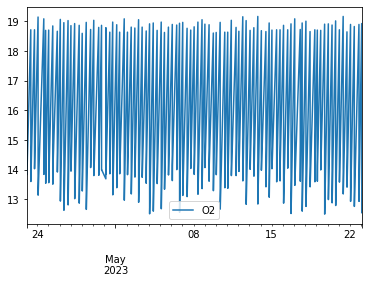

In [100]:
sgdata2[['O2']].plot()
plt.plot()

In [101]:
sgdata2.to_csv('sgdata2.csv')

[]

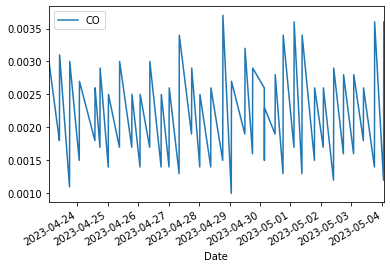

In [92]:
sgdata.set_index('Date')[['CO']][0:100].plot(x_compat=True)
plt.plot()

In [65]:
sgdata.plot()
plt.plot()

[]

ValueError: view limit minimum -36933.15235277778 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [37]:
sgdata.drop(0,axis=0,inplace=True)